In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download historical data from Yahoo Finance
ticker = 'AAPL'  # Apple Inc. ticker symbol
start_date = '2010-01-01'
end_date = '2023-01-01'

data = yf.download(ticker, start=start_date, end=end_date)

# Ensure the date index has a daily frequency
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')
data = data.fillna(method='ffill')  # Forward fill to handle missing values


[*********************100%%**********************]  1 of 1 completed


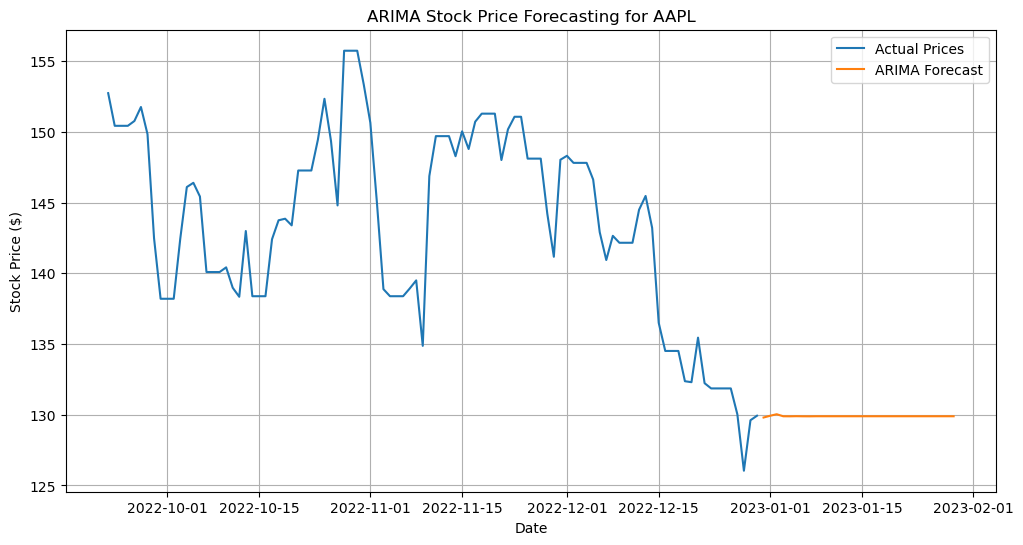

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Fit ARIMA model
model_arima = ARIMA(data['Close'], order=(5, 1, 0))  # Example order (p, d, q)
model_arima_fit = model_arima.fit()

# Forecasting
forecast_arima = model_arima_fit.forecast(steps=30)  # Forecasting 30 days ahead

# Plotting ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index[-100:], data['Close'].tail(100), label='Actual Prices')
plt.plot(pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D'), forecast_arima, label='ARIMA Forecast')
plt.title('ARIMA Stock Price Forecasting for AAPL')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(data['Close']).reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 30  # Sequence length
x_lstm, y_lstm = create_sequences(scaled_data, seq_length)

# Reshape data for LSTM input [samples, time steps, features]
x_lstm = np.reshape(x_lstm, (x_lstm.shape[0], x_lstm.shape[1], 1))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=False, input_shape=(seq_length, 1)))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Fit LSTM model
model_lstm.fit(x_lstm, y_lstm, epochs=50, batch_size=32)

# Forecasting
forecast_lstm = []
current_batch = scaled_data[-seq_length:].reshape((1, seq_length, 1))

for i in range(30):  # Forecasting 30 days ahead
    current_pred = model_lstm.predict(current_batch)[0]
    forecast_lstm.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

forecast_lstm = scaler.inverse_transform(forecast_lstm)


Epoch 1/50


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0243
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.9854e-04
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.7453e-04
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.6697e-04
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.7129e-04
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.6580e-04
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.5593e-04
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.3433e-04
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.3554e-04
Epoch 10/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.4073e-04
Epoch 11/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.1636e-04
Epoch 12/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.2008e-04
Epoch 13/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.0950e-04
Epoch 14/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.1108e-04
Ep

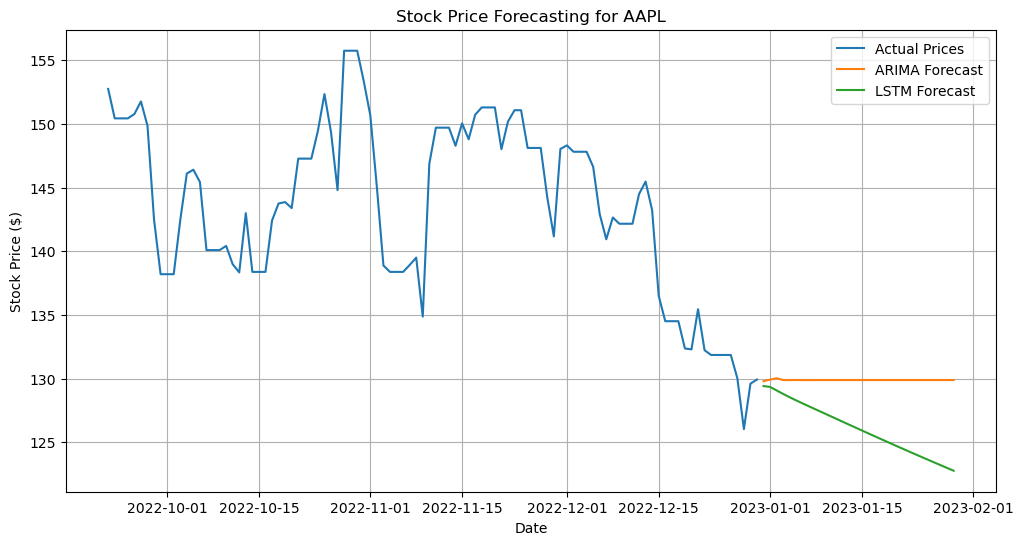

In [7]:
# Plotting forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index[-100:], data['Close'].tail(100), label='Actual Prices')
plt.plot(pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D'), forecast_arima, label='ARIMA Forecast')
plt.plot(pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D'), forecast_lstm, label='LSTM Forecast')
plt.title('Stock Price Forecasting for AAPL')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
pip install yfinance pandas matplotlib statsmodels scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install Sequential

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# THE END